# Bathymetric data

[*GEBCO Compilation Group (2020) GEBCO 2020 Grid (doi:10.5285/a29c5465-b138-234d-e053-6c86abc040b9*)](https://www.gebco.net/data_and_products/gridded_bathymetry_data/)


In [1]:
import xarray
import mikeio

In [2]:
ds = xarray.open_dataset("../tests/testdata/gebco_2020_n56.3_s55.2_w12.2_e13.1.nc")
ds

<xarray.Dataset>
Dimensions:    (lat: 264, lon: 216)
Coordinates:
  * lat        (lat) float64 55.2 55.21 55.21 55.21 ... 56.29 56.29 56.29 56.3
  * lon        (lon) float64 12.2 12.21 12.21 12.21 ... 13.09 13.09 13.09 13.1
Data variables:
    elevation  (lat, lon) int16 ...
Attributes:
    Conventions:  CF-1.6
    title:        The GEBCO_2020 Grid - a continuous terrain model for oceans...
    institution:  On behalf of the General Bathymetric Chart of the Oceans (G...
    source:       The GEBCO_2020 Grid is the latest global bathymetric produc...
    history:      Information on the development of the data set and the sour...
    references:   DOI: 10.5285/a29c5465-b138-234d-e053-6c86abc040b9
    comment:      The data in the GEBCO_2020 Grid should not be used for navi...
    node_offset:  1.0

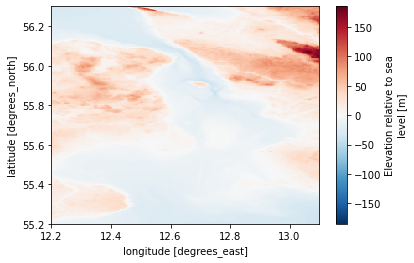

In [3]:
ds.elevation.plot();

In [4]:
ds.elevation.sel(lon=12.74792, lat=55.865, method="nearest")

<xarray.DataArray 'elevation' ()>
array(-43, dtype=int16)
Coordinates:
    lat      float64 55.86
    lon      float64 12.75
Attributes:
    standard_name:       height_above_reference_ellipsoid
    long_name:           Elevation relative to sea level
    units:               m
    sdn_parameter_urn:   SDN:P01::BATHHGHT
    sdn_parameter_name:  Sea floor height (above mean sea level) {bathymetric...
    sdn_uom_urn:         SDN:P06::ULAA
    sdn_uom_name:        Metres

Check ordering of dimensions, should be (y,x)

In [5]:
ds.elevation.dims

('lat', 'lon')

In [6]:
el = ds.elevation.values
el.shape

(264, 216)

Check that axes are increasing, S->N W->E

In [7]:
ds.lat.values[0], ds.lat.values[-1]

(55.20208333333332, 56.29791666666665)

In [8]:
ds.lat.values[0] < ds.lat.values[-1]

True

In [9]:
ds.lon.values[0], ds.lon.values[-1]

(12.20208333333332, 13.097916666666663)

In [10]:
el[0, 0]  # Bottom left

-8

In [11]:
el[-1, 0]  # Top Left

-31

In [12]:
geometry = mikeio.Grid2D(x=ds.lon.values, y=ds.lat.values, projection="LONG/LAT")
geometry

<mikeio.Grid2D>
x: [12.2, 12.21, ..., 13.1] (nx=216, dx=0.004167)
y: [55.2, 55.21, ..., 56.3] (ny=264, dy=0.004167)
projection: LONG/LAT

In [13]:
da = mikeio.DataArray(
    data=el,
    item=mikeio.ItemInfo("Elevation", mikeio.EUMType.Total_Water_Depth),
    geometry=geometry,
    dims=("y", "x"),  # No time dimension
)
da

<mikeio.DataArray>
name: Elevation
dims: (y:264, x:216)
time: 2018-01-01 00:00:00 (time-invariant)
geometry: Grid2D (ny=264, nx=216)

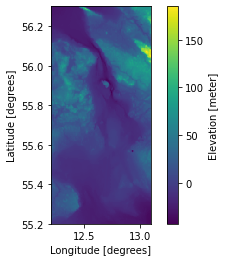

In [14]:
da.plot();

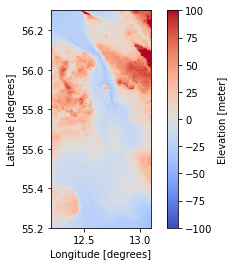

In [15]:
da.plot(cmap="coolwarm", vmin=-100, vmax=100);

In [16]:
da.to_dfs("gebco.dfs2")

<AxesSubplot:xlabel='Longitude [degrees]', ylabel='Latitude [degrees]'>

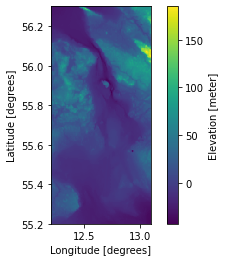

In [17]:
ds = mikeio.read("gebco.dfs2")
ds.Elevation.plot()

# Clean up

In [18]:
import os

os.remove("gebco.dfs2")